<h1><center>DATA CLEANING</center></h1>

### Import Essential Libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

### Load Test Image

In [2]:
img = cv2.imread('./test_images/rohan.jpg')
img.shape

(612, 408, 3)

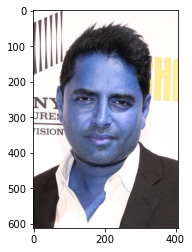

In [3]:
# Plotting image 

plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

In [5]:
gray

array([[253, 253, 253, ..., 252, 252, 252],
       [253, 253, 253, ..., 252, 252, 252],
       [253, 253, 253, ..., 252, 252, 252],
       ...,
       [ 32,  32,  31, ...,  56,  43,  48],
       [ 32,  32,  31, ...,  58,  47,  52],
       [ 32,  32,  31, ...,  59,  48,  54]], dtype=uint8)

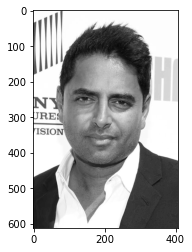

In [6]:
# Plotting image in B&W (its easy for the Algorith to work in B&W)

plt.imshow(gray, cmap='gray')

### Using haar cascade algorithm

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 62, 148, 274, 274]], dtype=int32)

In [8]:
# Detecting the face

(x,y,w,h) = faces[0]
x,y,w,h

(62, 148, 274, 274)

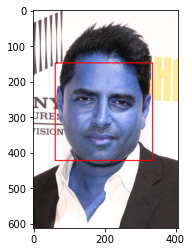

In [9]:
# Drawing a rectangle around the face

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

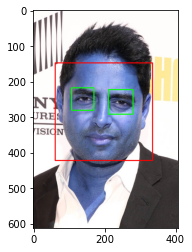

In [10]:
# Highlighting the eyes

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

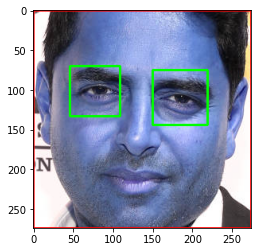

In [11]:
# Cropping the face region (This is what we are intrested in)

%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
# Creating a funftion which can repeat this same process for all images

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

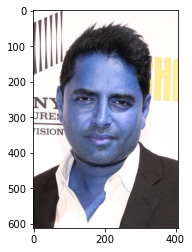

In [13]:
original_image = cv2.imread('./test_images/rohan.jpg')
plt.imshow(original_image)

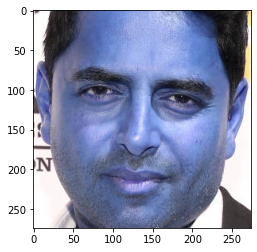

In [14]:
# calling the function

cropped_image = get_cropped_image_if_2_eyes('./test_images/rohan.jpg')
plt.imshow(cropped_image)

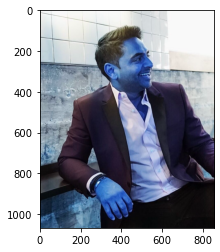

In [15]:
original_image = cv2.imread('./test_images/rohan1.jpg')
plt.imshow(original_image)

In [16]:
# This function is not showing as result for the above image as the face is partially visible

cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/rohan1.jpg')
cropped_image_no_2_eyes

### Now we need to follow all the steps we performed on our sample images & save them in new folder

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/Barbara_Corcoran',
 './dataset/Kevin_Oleary',
 './dataset/Lori_Greiner',
 './dataset/Mark_Cuban',
 './dataset/Rohan_Oza']

In [20]:
# Creating cropped folder

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Barbara_Corcoran
Generating cropped images in folder:  ./dataset/cropped/Barbara_Corcoran
Kevin_Oleary
Generating cropped images in folder:  ./dataset/cropped/Kevin_Oleary
Lori_Greiner
Generating cropped images in folder:  ./dataset/cropped/Lori_Greiner
Mark_Cuban
Generating cropped images in folder:  ./dataset/cropped/Mark_Cuban
Rohan_Oza
Generating cropped images in folder:  ./dataset/cropped/Rohan_Oza


<h1><center>FEATURE ENGINEERING</center></h1>

### Wavelet transformation

In [22]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

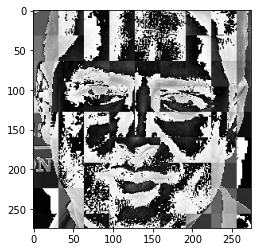

In [23]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [36]:
# Now we need to verticall stack the raw and wavelet transformed image

celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Barbara_Corcoran': ['./dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran10.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran11.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran12.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran13.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran15.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran16.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran17.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran18.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran19.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran2.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran20.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran21.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran22.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran23.png',
  './dataset/cropped/Barbara_Corcoran\\Barbara_Corcoran24.png',
  './dataset/cropped/

In [37]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Barbara_Corcoran': 0,
 'Kevin_Oleary': 1,
 'Lori_Greiner': 2,
 'Mark_Cuban': 3,
 'Rohan_Oza': 4}

In [38]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [39]:
len(X)

146

In [40]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(146, 4096)

In [41]:
X[0]

array([141., 125., 109., ..., 204., 151., 189.])

<h1><center>MODEL TRAINING</center></h1>

### We will use SVM with rbf kernel tuned with heuristic finetuning

In [42]:
# Import necessary libraries

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
# Train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [45]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [46]:
pipe.score(X_test, y_test)

0.7027027027027027

In [47]:
len(X_test)

37

In [48]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.00      0.00      0.00         5
           2       1.00      0.33      0.50         3
           3       1.00      0.78      0.88         9
           4       0.62      1.00      0.77        10

    accuracy                           0.70        37
   macro avg       0.65      0.58      0.57        37
weighted avg       0.66      0.70      0.65        37



C:\Users\Hrishi_rich\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Let's use GridSearch to try out different models with different parameters. The goal is to come up with best modle with best fine tuned parameters

In [49]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [51]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.871861,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.698268,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.861472,{'logisticregression__C': 5}


In [53]:
best_estimators['svm'].score(X_test,y_test)

0.8918918918918919

In [54]:
best_estimators['random_forest'].score(X_test,y_test)

0.6486486486486487

In [55]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8918918918918919

In [56]:
best_clf = best_estimators['svm']

In [57]:
# Plotting a confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0,  0],
       [ 2,  3,  0,  0,  0],
       [ 1,  0,  2,  0,  0],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

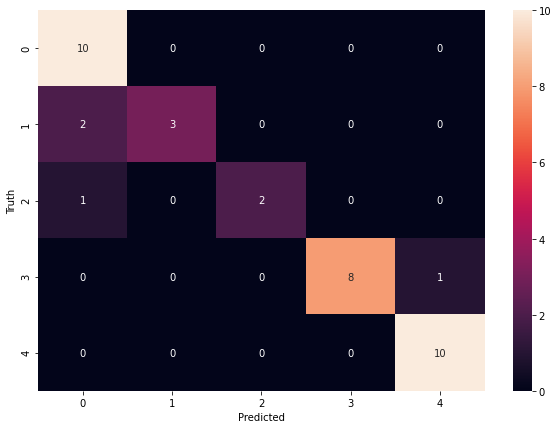

In [58]:
# Plotting heatmap

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
class_dict

{'Barbara_Corcoran': 0,
 'Kevin_Oleary': 1,
 'Lori_Greiner': 2,
 'Mark_Cuban': 3,
 'Rohan_Oza': 4}

### Save the training model (using joblib)

In [61]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### Save class dictionary

In [62]:
import json
with open("class_dictionary","w")as f:
    f.write(json.dumps(class_dict))